In [1]:
# https://drive.google.com/file/d/17UjW8RuTPJr-_sr_j8lkI3KyoiPNMoBP/view?usp=sharing
# https://drive.google.com/file/d/1cb-sYWuIKxYrthCIU-0qaaZlzSJ5d7xz/view?usp=sharing

!gdown 17UjW8RuTPJr-_sr_j8lkI3KyoiPNMoBP
!gdown 1cb-sYWuIKxYrthCIU-0qaaZlzSJ5d7xz

Downloading...
From: https://drive.google.com/uc?id=17UjW8RuTPJr-_sr_j8lkI3KyoiPNMoBP
To: /content/right.jpg
100% 165k/165k [00:00<00:00, 65.5MB/s]
Downloading...
From: https://drive.google.com/uc?id=1cb-sYWuIKxYrthCIU-0qaaZlzSJ5d7xz
To: /content/left.jpg
100% 167k/167k [00:00<00:00, 72.1MB/s]


In [2]:
# Install necessary packages
!apt-get -qq install -y cmake libopencv-dev

In [3]:
# Clone OpenCV repository
!git clone https://github.com/opencv/opencv.git
!git clone https://github.com/opencv/opencv_contrib.git


Cloning into 'opencv'...
remote: Enumerating objects: 336335, done.
remote: Counting objects: 100% (1103/1103), done.
remote: Compressing objects: 100% (884/884), done.
remote: Total 336335 (delta 477), reused 648 (delta 187), pack-reused 335232 (from 1)
Receiving objects: 100% (336335/336335), 527.18 MiB | 22.26 MiB/s, done.
Resolving deltas: 100% (234466/234466), done.
Updating files: 100% (7567/7567), done.
Cloning into 'opencv_contrib'...
remote: Enumerating objects: 41556, done.
remote: Counting objects: 100% (1315/1315), done.
remote: Compressing objects: 100% (952/952), done.
remote: Total 41556 (delta 496), reused 916 (delta 288), pack-reused 40241 (from 1)
Receiving objects: 100% (41556/41556), 149.98 MiB | 24.76 MiB/s, done.
Resolving deltas: 100% (25628/25628), done.


In [4]:
# Create build directory
!mkdir /content/build
%cd /content/build


/content/build


In [5]:
# Configure OpenCV with CMake
!cmake -DOPENCV_ENABLE_NONFREE=ON -DOPENCV_EXTRA_MODULES_PATH=/content/opencv_contrib/modules /content/opencv


-- 'Release' build type is used by default. Use CMAKE_BUILD_TYPE to specify build type (Release or Debug)
-- The CXX compiler identification is GNU 11.4.0
-- The C compiler identification is GNU 11.4.0
-- Detecting CXX compiler ABI info
-- Detecting CXX compiler ABI info - done
-- Check for working CXX compiler: /usr/bin/c++ - skipped
-- Detecting CXX compile features
-- Detecting CXX compile features - done
-- Detecting C compiler ABI info
-- Detecting C compiler ABI info - done
-- Check for working C compiler: /usr/bin/cc - skipped
-- Detecting C compile features
-- Detecting C compile features - done
-- Detected processor: x86_64
-- Found PythonInterp: /usr/bin/python3 (found suitable version "3.10.12", minimum required is "3.2")
-- Found PythonLibs: /usr/lib/x86_64-linux-gnu/libpython3.10.so (found suitable exact version "3.10.12")
-- Looking for ccache - not found
-- Performing Test HAVE_CXX_FSIGNED_CHAR
-- Performing Test HAVE_CXX_FSIGNED_CHAR - Success
-- Performing Test HAVE_C_

In [6]:
# Build and install OpenCV
!make -j8
!make install

[  0%] Built target opencv_dnn_plugins
[  0%] Built target opencv_videoio_plugins
[  0%] Built target opencv_highgui_plugins
[  0%] Building C object 3rdparty/ittnotify/CMakeFiles/ittnotify.dir/src/ittnotify/jitprofiling.c.o
[  0%] Building C object 3rdparty/ittnotify/CMakeFiles/ittnotify.dir/src/ittnotify/ittnotify_static.c.o
[  0%] Building C object 3rdparty/ippiw/CMakeFiles/ippiw.dir/src/iw_core.c.o
[  0%] Building C object 3rdparty/ippiw/CMakeFiles/ippiw.dir/src/iw_image.c.o
[  0%] Building C object 3rdparty/ippiw/CMakeFiles/ippiw.dir/src/iw_image_color_convert_all.c.o
[  0%] Building CXX object CMakeFiles/ade.dir/3rdparty/ade/ade-0.1.2d/sources/ade/source/alloc.cpp.o
[  0%] Building CXX object 3rdparty/protobuf/CMakeFiles/libprotobuf.dir/src/google/protobuf/any_lite.cc.o
[  0%] Generate files for Python bindings and documentation
[  0%] Building CXX object 3rdparty/protobuf/CMakeFiles/libprotobuf.dir/src/google/protobuf/arena.cc.o
[  0%] Building C object 3rdparty/ippiw/CMakeFiles

In [8]:
import cv2
# lets check the documentation of surf algorithm
help(cv2.xfeatures2d.SURF_create)

Help on built-in function SURF_create:

SURF_create(...)
    SURF_create([, hessianThreshold[, nOctaves[, nOctaveLayers[, extended[, upright]]]]]) -> retval
    .   @param hessianThreshold Threshold for hessian keypoint detector used in SURF.
    .       @param nOctaves Number of pyramid octaves the keypoint detector will use.
    .       @param nOctaveLayers Number of octave layers within each octave.
    .       @param extended Extended descriptor flag (true - use extended 128-element descriptors; false - use
    .       64-element descriptors).
    .       @param upright Up-right or rotated features flag (true - do not compute orientation of features;
    .       false - compute orientation).



In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
from PIL import Image
import os
from torch.utils.data import Dataset, DataLoader
from skimage import color
from skimage.feature import hog
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier # using 1NN

In [10]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


# 1. Download the [cow teat datasets](https://github.com/YoushanZhang/SCTL) (10 points) resize image to (224, 224)

### (1). Create a train data loader that returns image arrays and labels
### (2). Create a test data loader that returns image arrays and file names
### (3). Print image arrays, labels and file names dimensions

In [42]:
import os
import cv2
import numpy as np
from sklearn.preprocessing import LabelEncoder

# Load and preprocess images
def load_and_preprocess_image(image_path):
    """
    Function to load and preprocess an image:
    1. Reads the image from the path.
    2. Resizes it to (224, 224).
    3. Converts the image to grayscale.
    Returns the preprocessed image.
    """
    image = cv2.imread(image_path)
    image = cv2.resize(image, (224, 224))
    image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    return image

# Train data loader for a single dataset
def load_train_data_from_dir(train_dir):
    """
    Function to load and preprocess images and labels from a directory.
    Returns: preprocessed images and corresponding labels.
    """
    images = []
    labels = []

    # Get the list of class names (subdirectories) excluding hidden files
    class_names = [d for d in os.listdir(train_dir) if os.path.isdir(os.path.join(train_dir, d)) and not d.startswith('.')]

    # Loop through each class (subdirectory)
    for class_name in class_names:
        class_dir = os.path.join(train_dir, class_name)
        for filename in os.listdir(class_dir):
            file_path = os.path.join(class_dir, filename)
            image = load_and_preprocess_image(file_path)
            images.append(image)
            labels.append(class_name)

    return images, labels, class_names

# Combine two train datasets
def combine_train_datasets(train_dir1, train_dir2):
    """
    Function to combine images and labels from two separate training directories.
    It will:
    1. Load images and labels from both directories.
    2. Encode the class names to numeric labels.
    3. Combine both datasets into one.
    Returns: combined images and labels.
    """
    # Load the data from both training directories
    images1, labels1, class_names1 = load_train_data_from_dir(train_dir1)
    images2, labels2, class_names2 = load_train_data_from_dir(train_dir2)

    # Combine images and labels from both datasets
    combined_images = images1 + images2
    combined_labels = labels1 + labels2

    # Combine class names from both datasets
    combined_class_names = list(set(class_names1 + class_names2))

    # Encode the class names into numeric labels
    label_encoder = LabelEncoder()
    label_encoder.fit(combined_class_names)
    combined_labels = label_encoder.transform(combined_labels)

    # Convert images and labels to numpy arrays
    combined_images = np.array(combined_images)
    combined_labels = np.array(combined_labels)

    return combined_images, combined_labels

# Test data loader
def test_data_loader(test_dir):
    """
    Function to load and preprocess test images.
    It will:
    1. Collect images from the test directory.
    2. Return images along with their corresponding file names.
    """
    images = []
    file_names = []

    # Loop through each file in the test directory
    for filename in os.listdir(test_dir):
        file_path = os.path.join(test_dir, filename)
        image = load_and_preprocess_image(file_path)
        images.append(image)
        file_names.append(filename)

    images = np.array(images)
    return images, file_names


# Paths to dataset
train_dir1 = '/content/drive/My Drive/Train_1'
train_dir2 = '/content/drive/My Drive/Train_2'
test_dir = '/content/drive/My Drive/Test dataset'

# Combine the two train datasets
train_images, train_labels = combine_train_datasets(train_dir1, train_dir2)

# Load the test dataset
test_images, test_file_names = test_data_loader(test_dir)

# Output example of loaded images and labels
print(f'Example train image array: {train_images[0]}')
print(f'Example train label: {train_labels[0]}')
print(f'Example test image array: {test_images[0]}')
print(f'Example test file name: {test_file_names[0]}')

# Print the shapes of the combined train and test data
print(f'Train images shape: {train_images.shape}')
print(f'Train labels shape: {train_labels.shape}')
print(f'Test images shape: {test_images.shape}')
print(f'Test file names count: {len(test_file_names)}')


Example train image array: [[163 171 170 ... 143 141 142]
 [170 172 168 ... 140 137 139]
 [173 173 172 ... 138 137 139]
 ...
 [ 99  99  96 ...  50  50  55]
 [ 99 102  95 ...  48  49  47]
 [ 97  97  96 ...  48  51  51]]
Example train label: 1
Example test image array: [[140 141 139 ... 134 132 131]
 [133 134 133 ... 133 130 128]
 [129 130 131 ... 130 127 124]
 ...
 [ 49  47  46 ...  18  16  16]
 [ 47  48  48 ...  19  16  18]
 [ 47  50  50 ...  23  19  22]]
Example test file name: R7_0665_17_crop_RH_C3_PN_m.jpg
Train images shape: (1149, 224, 224)
Train labels shape: (1149,)
Test images shape: (380, 224, 224)
Test file names count: 380


# 2. Extract features of training and test images using HOG (20 points)
Please print the size of extracted features, e.g., training features: 1149 * d, test features: 380 *d

In [57]:
from skimage.feature import hog
import numpy as np
import pandas as pd

# HOG parameters
orientations = 9
pixels_per_cell = (8, 8)
cells_per_block = (2, 2)
block_norm = 'L2-Hys'

# Function to extract HOG features from images
def extract_hog_features(images):
    """
    Extracts HOG features from a list of images.

    Args:
        images (list or array): List of grayscale images.

    Returns:
        features (array): 2D array where each row represents the HOG features of an image.
    """
    features = []
    for image in images:
        # Compute HOG features
        hog_feat = hog(image, orientations=orientations, pixels_per_cell=pixels_per_cell,
                       cells_per_block=cells_per_block, block_norm=block_norm, visualize=False)
        # Flatten to ensure fixed-length features per image
        hog_feat_flat = hog_feat.ravel()
        features.append(hog_feat_flat)

    # Convert list of features into a NumPy array
    features = np.array(features)
    return features


# Extract HOG features from train images
train_features_hog = extract_hog_features(train_images)

# Extract HOG features from test images
test_features_hog = extract_hog_features(test_images)

# Print the size of extracted features for train and test data
train_samples, d_train = train_features_hog.shape
print(f"Training features: {train_samples} * {d_train}")

test_samples, d_test = test_features_hog.shape
print(f"Test features: {test_samples} * {d_test}")

# Combine test features with file names into a DataFrame
df_test_features = pd.DataFrame(test_features_hog)
df_test_features['Filename'] = test_file_names

# Rearranging the columns so that 'Filename' is the first column
df_test_features = df_test_features[['Filename'] + [col for col in df_test_features.columns if col != 'Filename']]

# Display the DataFrame
print(df_test_features.head())



Training features: 1149 * 26244
Test features: 380 * 26244
                          Filename         0         1         2         3  \
0   R7_0665_17_crop_RH_C3_PN_m.jpg  0.021805  0.006095  0.034965  0.094217   
1   R5_0615_45_crop_RF_C3_PN_m.jpg  0.243952  0.093187  0.070910  0.068979   
2   R11_0829_6_crop_RF_C3_PN_m.jpg  0.230504  0.155126  0.136234  0.064283   
3  R10_0807_17_crop_RH_C3_PP_m.jpg  0.229629  0.096381  0.175615  0.035034   
4  R1_0463_36a_crop_RH_C3_PP_m.jpg  0.245248  0.109896  0.085264  0.127405   

          4         5         6         7         8  ...     26234     26235  \
0  0.326364  0.307512  0.149206  0.045535  0.000000  ...  0.061958  0.227554   
1  0.267526  0.226853  0.160012  0.199394  0.074643  ...  0.039702  0.265935   
2  0.129659  0.177910  0.128810  0.089078  0.115172  ...  0.081021  0.253912   
3  0.239497  0.200894  0.038432  0.095651  0.063627  ...  0.144509  0.235957   
4  0.290276  0.150690  0.077469  0.160583  0.144420  ...  0.000000  0.27

# 3. Extract features of training and test images using SIFT (20 points)
Please print the size of extracted features, e.g., training features: 1149 * d, test features: 380 *d

In [58]:
import cv2
import numpy as np
import pandas as pd

# Initialize the SIFT feature extractor with a maximum of 500 features
sift = cv2.SIFT_create(nfeatures=500)

# Define the number of keypoints to extract per image
num_keypoints = 100

# Function to extract SIFT features with a fixed number of keypoints
def extract_sift_features(images, num_keypoints=100):
    """
    Extract SIFT features from a list of images.
    Ensures a fixed number of keypoints (num_keypoints) per image by padding or truncating.

    Args:
        images (list or array): List of grayscale images.
        num_keypoints (int): Desired number of keypoints per image.

    Returns:
        features (array): 2D array where each row represents the SIFT features of an image.
    """
    features = []

    for image in images:
        # Detect SIFT keypoints and descriptors
        keypoints, descriptors = sift.detectAndCompute(image, None)

        if descriptors is not None:
            # Ensure fixed number of keypoints by padding or truncating
            if len(descriptors) < num_keypoints:
                # Padding with zeros if fewer keypoints are detected
                padding = np.zeros((num_keypoints - len(descriptors), descriptors.shape[1]))
                descriptors = np.vstack((descriptors, padding))
            else:
                # Truncating to the fixed number of keypoints
                descriptors = descriptors[:num_keypoints]

            # Flatten the descriptors into a 1D array
            descriptors_flat = descriptors.ravel()
            features.append(descriptors_flat)
        else:
            # If no keypoints are detected, append a zero array of size (num_keypoints * 128)
            features.append(np.zeros((num_keypoints * 128,)))

    # Convert list of features into a NumPy array
    features = np.array(features)
    return features

# Extract SIFT features from training images
train_features_sift = extract_sift_features(train_images, num_keypoints)
print(f"Training features: {train_features_sift.shape[0]} * {train_features_sift.shape[1]}")

# Extract SIFT features from test images
test_features_sift = extract_sift_features(test_images, num_keypoints)
print(f"Test features: {test_features_sift.shape[0]} * {test_features_sift.shape[1]}")

# Combine test features with file names into a DataFrame
df_test_features_sift = pd.DataFrame(test_features_sift)
df_test_features_sift['Filename'] = test_file_names

# Rearrange the columns so that 'Filename' is the first column
df_test_features_sift = df_test_features_sift[['Filename'] + [col for col in df_test_features_sift.columns if col != 'Filename']]

# Display the DataFrame
print(df_test_features_sift.head())


Training features: 1149 * 12800
Test features: 380 * 12800
                          Filename     0      1     2     3     4     5     6  \
0   R7_0665_17_crop_RH_C3_PN_m.jpg   2.0    4.0  26.0  26.0  10.0  15.0   7.0   
1   R5_0615_45_crop_RF_C3_PN_m.jpg  45.0   66.0  27.0   2.0   0.0   0.0   0.0   
2   R11_0829_6_crop_RF_C3_PN_m.jpg  21.0  138.0  72.0   0.0   0.0   0.0   2.0   
3  R10_0807_17_crop_RH_C3_PP_m.jpg   1.0    0.0   0.0   0.0   0.0   0.0   0.0   
4  R1_0463_36a_crop_RH_C3_PP_m.jpg  16.0    6.0   3.0   6.0   4.0  17.0  40.0   

      7     8  ...  12790  12791  12792  12793  12794  12795  12796  12797  \
0   1.0  22.0  ...    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
1  11.0   4.0  ...    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
2   3.0   7.0  ...    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
3   1.0   5.0  ...    3.0   11.0    4.0   11.0    7.0    6.0   12.0    5.0   
4  10.0  31.0  ...    0.0    0.0    0.0    0.0    0.0    0.0    

# 4. Extract features of training and test images using SURF (20 points)
Please print the size of extracted features, e.g., training features: 1149 * d, test features: 380 *d

In [59]:
import cv2
import numpy as np
import pandas as pd

# Initialize the SURF feature extractor with a specific hessian threshold
surf = cv2.xfeatures2d.SURF_create(hessianThreshold=400)

# Function to extract SURF features with a fixed number of keypoints
def extract_surf_features(images, num_keypoints=100):
    """
    Extract SURF features from a list of images.
    Ensures a fixed number of keypoints (num_keypoints) per image by padding or truncating.

    Args:
        images (list or array): List of grayscale images.
        num_keypoints (int): Desired number of keypoints per image.

    Returns:
        features (array): 2D array where each row represents the SURF features of an image.
    """
    features = []

    for image in images:
        # Detect SURF keypoints and descriptors
        keypoints, descriptors = surf.detectAndCompute(image, None)

        if descriptors is not None:
            # Ensure fixed number of keypoints by padding or truncating
            if len(descriptors) < num_keypoints:
                # Padding with zeros if fewer keypoints are detected
                padding = np.zeros((num_keypoints - len(descriptors), descriptors.shape[1]))
                descriptors = np.vstack((descriptors, padding))
            else:
                # Truncating to the fixed number of keypoints
                descriptors = descriptors[:num_keypoints]

            # Flatten the descriptors into a 1D array
            descriptors_flat = descriptors.ravel()
            features.append(descriptors_flat)
        else:
            # If no keypoints are detected, append a zero array of size (num_keypoints * 64)
            features.append(np.zeros((num_keypoints * 64,)))

    # Convert list of features into a NumPy array
    features = np.array(features)
    return features

# Define the number of keypoints to extract
num_keypoints = 100


# Extract SURF features from training images
train_features_surf = extract_surf_features(train_images, num_keypoints)
print(f"Training features: {train_features_surf.shape[0]} * {train_features_surf.shape[1]}")

# Extract SURF features from test images
test_features_surf = extract_surf_features(test_images, num_keypoints)
print(f"Test features: {test_features_surf.shape[0]} * {test_features_surf.shape[1]}")

# Combine test features with file names into a DataFrame
df_test_features_surf = pd.DataFrame(test_features_surf)
df_test_features_surf['Filename'] = test_file_names

# Rearrange the columns so that 'Filename' is the first column
df_test_features_surf = df_test_features_surf[['Filename'] + [col for col in df_test_features_surf.columns if col != 'Filename']]

# Display the DataFrame
print(df_test_features_surf.head())


Training features: 1149 * 6400
Test features: 380 * 6400
                          Filename         0         1         2         3  \
0   R7_0665_17_crop_RH_C3_PN_m.jpg  0.000128 -0.001010  0.001273  0.001517   
1   R5_0615_45_crop_RF_C3_PN_m.jpg  0.001416 -0.004555  0.001866  0.004555   
2   R11_0829_6_crop_RF_C3_PN_m.jpg -0.000265 -0.000119  0.000315  0.000259   
3  R10_0807_17_crop_RH_C3_PP_m.jpg  0.004291  0.000519  0.004291  0.001693   
4  R1_0463_36a_crop_RH_C3_PP_m.jpg -0.005194 -0.002867  0.005947  0.003485   

          4         5         6         7         8  ...  6390  6391  6392  \
0  0.068158  0.012786  0.068324  0.020259  0.027482  ...   0.0   0.0   0.0   
1  0.008016 -0.013137  0.012627  0.014363 -0.002928  ...   0.0   0.0   0.0   
2 -0.003135  0.002144  0.004166  0.003738 -0.006576  ...   0.0   0.0   0.0   
3  0.005731  0.027997  0.036691  0.028627 -0.005035  ...   0.0   0.0   0.0   
4 -0.007364 -0.005187  0.009578  0.006099  0.004922  ...   0.0   0.0   0.0   

   63

# 5. Call SVM and kNN from scikit-learn and train the extracted HOG, SIFT and SURF features, respectively, save three CSV files of test dataset using three features (10 points)

In [67]:
import pandas as pd
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

# Function to train and predict using SVM and kNN
def train_and_predict(train_features, train_labels, test_features):
    """
    Function to train both SVM and kNN classifiers and return their predictions.

    Args:
        train_features (array): Features of the training set.
        train_labels (array): Labels of the training set.
        test_features (array): Features of the test set.

    Returns:
        svm_predictions (array): Predictions made by the SVM model.
        knn_predictions (array): Predictions made by the kNN model.
    """
    # Train SVM model
    svm = SVC(kernel='linear')
    svm.fit(train_features, train_labels)
    svm_predictions = svm.predict(test_features)

    # Train kNN model
    knn = KNeighborsClassifier(n_neighbors=1)
    knn.fit(train_features, train_labels)
    knn_predictions = knn.predict(test_features)

    return svm_predictions, knn_predictions

# Function to save predictions to CSV
def save_predictions_to_csv(predictions, filenames, filename):
    """
    Saves the predictions and filenames to a CSV file without headers.

    Args:
        predictions (array): Model predictions.
        filenames (list): List of test file names.
        filename (str): Name of the output CSV file.
    """
    if len(filenames) != len(predictions):
        raise ValueError("Number of filenames and predictions do not match!")

    df = pd.DataFrame({
        "Filename": filenames,
        "Prediction": predictions
    })

    # Save CSV without headers
    df.to_csv(filename, index=False, header=False)


# Train and predict for HOG features
hog_svm_predictions, hog_knn_predictions = train_and_predict(train_features_hog, train_labels, test_features_hog)
save_predictions_to_csv(hog_svm_predictions, test_file_names, 'hog_svm_predictions3.csv')
save_predictions_to_csv(hog_knn_predictions, test_file_names, 'hog_knn_predictions3.csv')

# Train and predict for SIFT features
sift_svm_predictions, sift_knn_predictions = train_and_predict(train_features_sift, train_labels, test_features_sift)
save_predictions_to_csv(sift_svm_predictions, test_file_names, 'sift_svm_predictions3.csv')
save_predictions_to_csv(sift_knn_predictions, test_file_names, 'sift_knn_predictions3.csv')

# Train and predict for SURF features
surf_svm_predictions, surf_knn_predictions = train_and_predict(train_features_surf, train_labels, test_features_surf)
save_predictions_to_csv(surf_svm_predictions, test_file_names, 'surf_svm_predictions3.csv')
save_predictions_to_csv(surf_knn_predictions, test_file_names, 'surf_knn_predictions3.csv')


# 6. Report the accuracy using Cow_teat_classfication_accuracy software, please attach the results image here (20 points)

(1). SVM and 1NN using HOG features

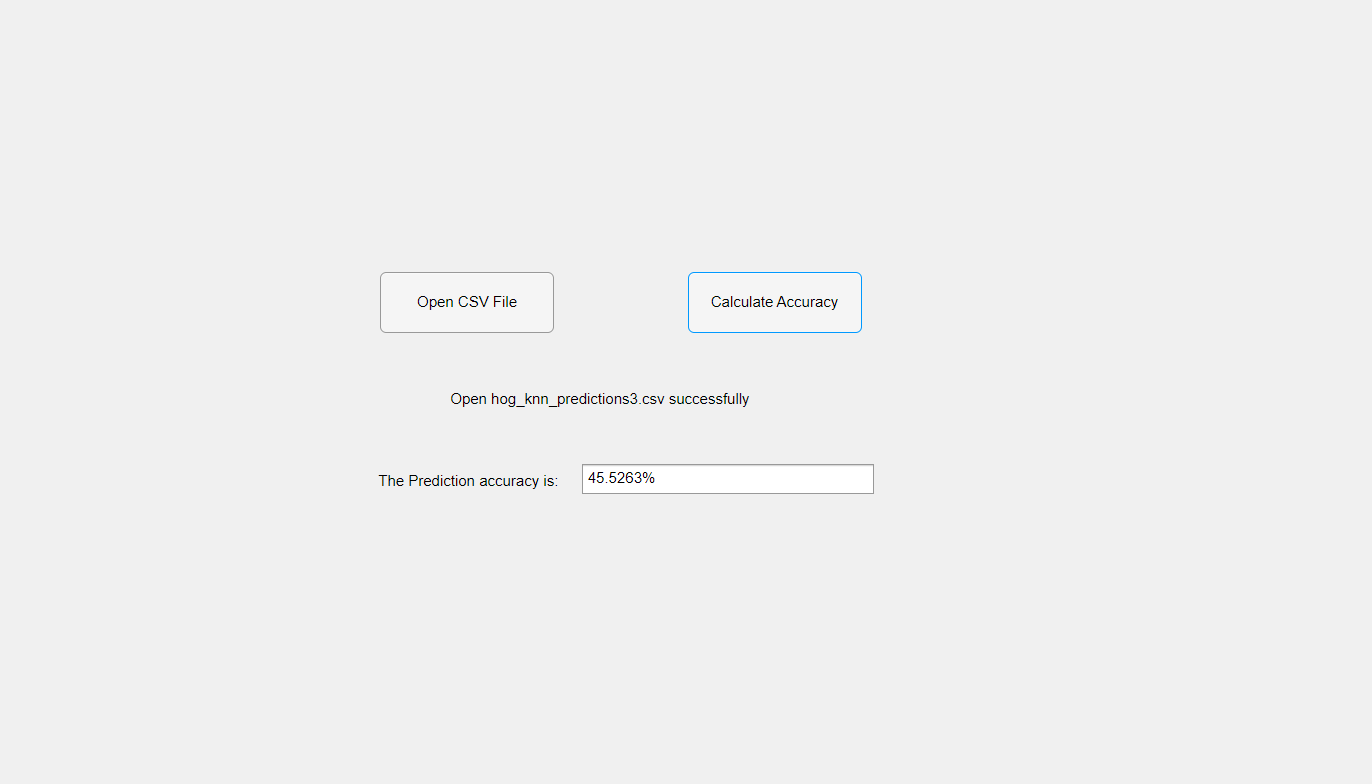

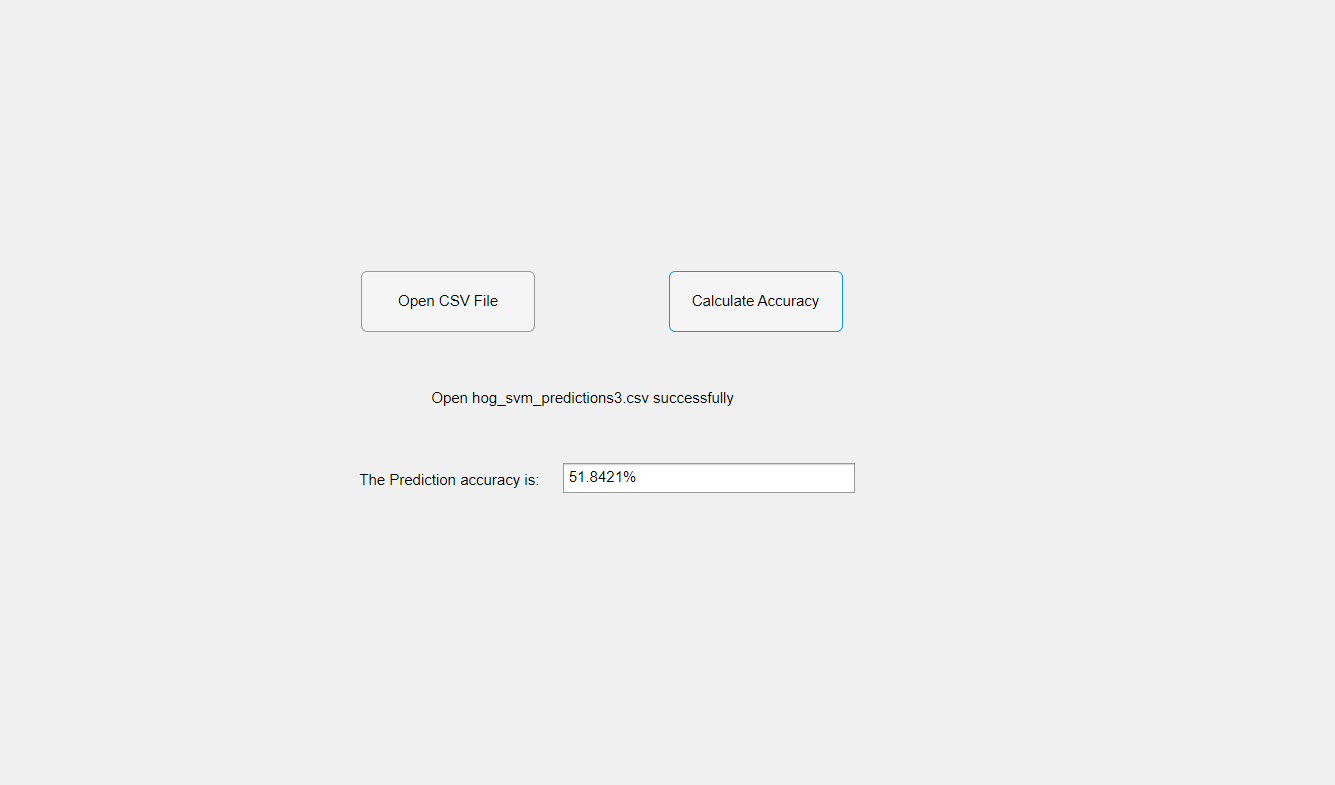

(2). SVM and 1NN using SIFT features

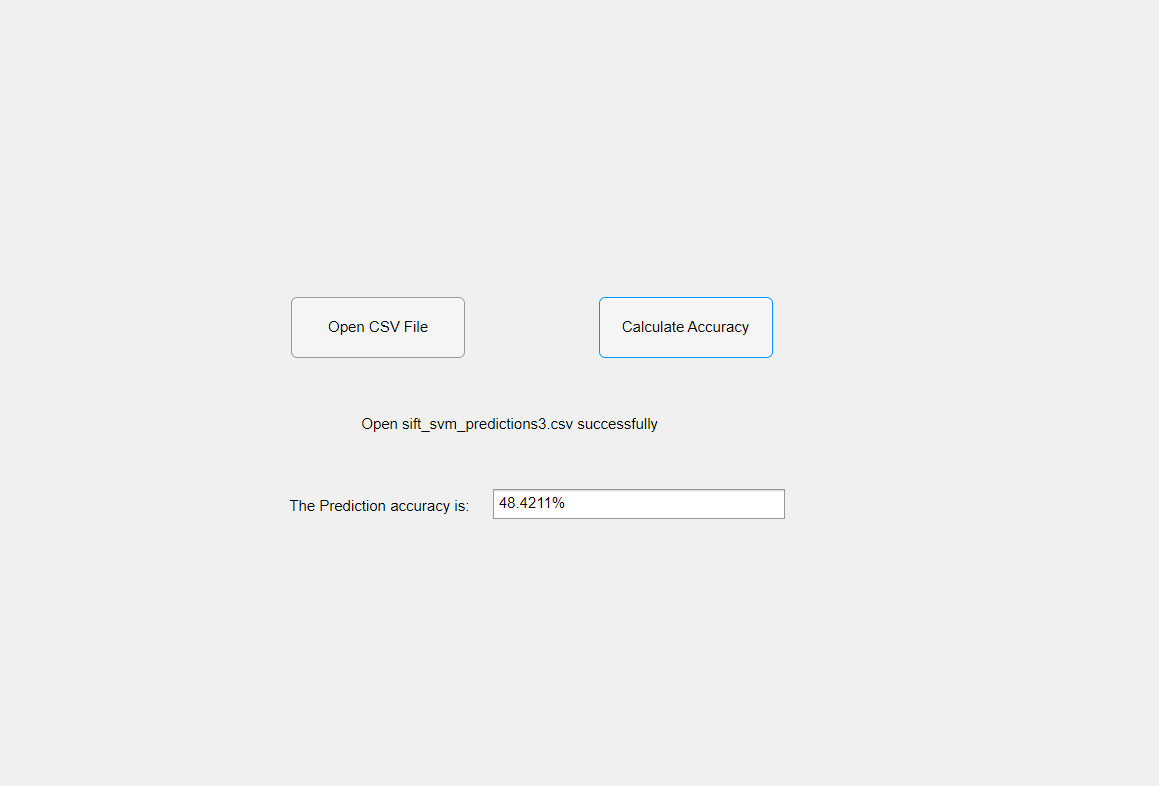

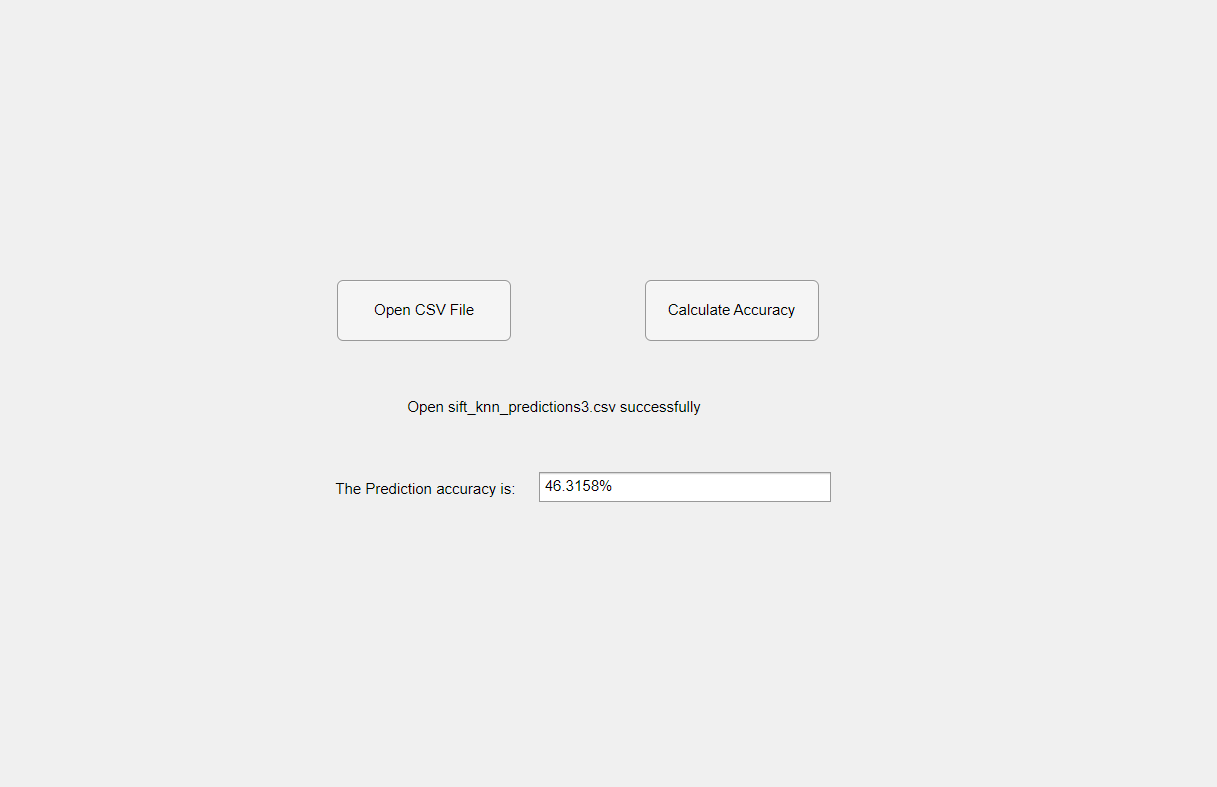

(3). SVM and 1NN using SURF features

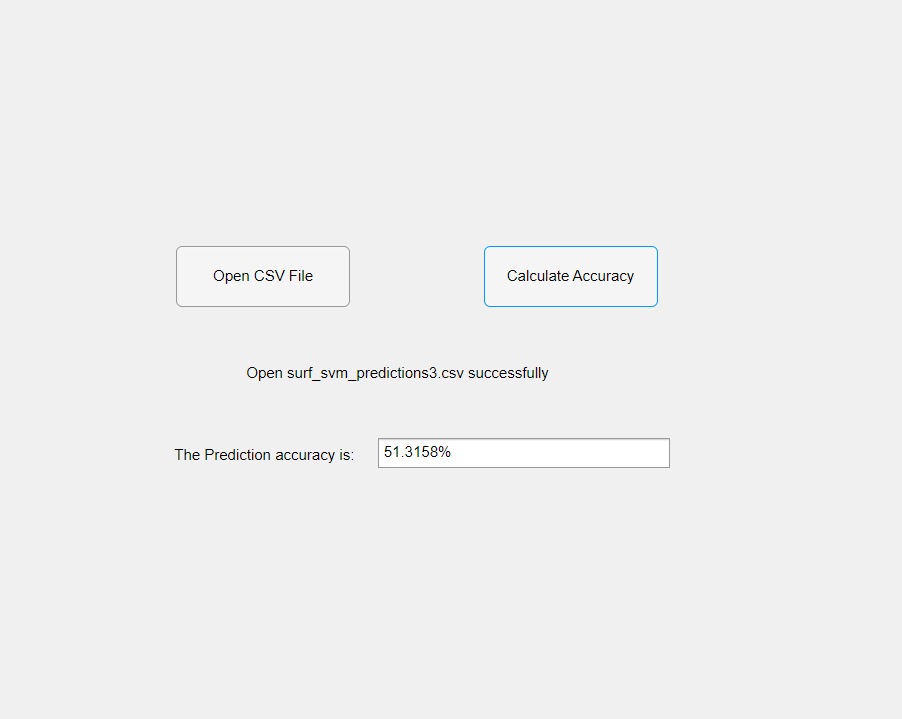

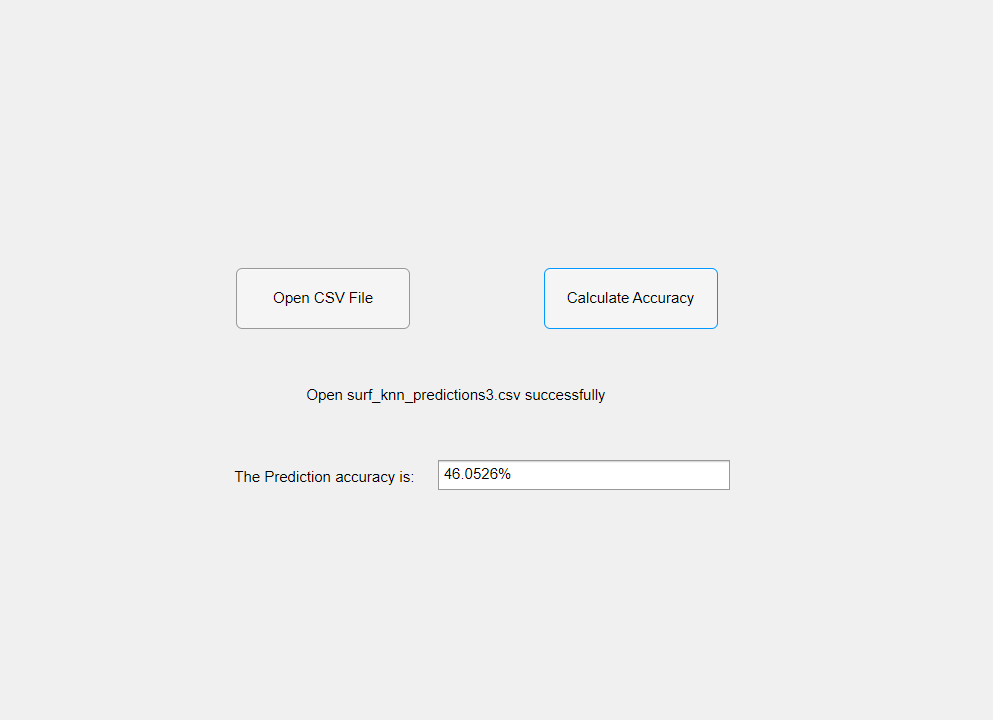